<a href="https://colab.research.google.com/github/devroopsaha744/MLCOE-TASK-2/blob/main/MLCOE_Task_2_Classification_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [173]:
df = pd.read_csv("/content/singaporeclassif.csv")

##  **Data Collection**

In [174]:
df

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 SGD,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 SGD,48,good,furniture/appliances,5951,< 100 SGD,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 SGD,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 SGD,42,good,furniture/appliances,7882,< 100 SGD,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 SGD,24,poor,car,4870,< 100 SGD,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,unknown,12,good,furniture/appliances,1736,< 100 SGD,4 - 7 years,3,4,31,none,own,1,unskilled,1,no,no
996,< 0 SGD,30,good,car,3857,< 100 SGD,1 - 4 years,4,4,40,none,own,1,management,1,yes,no
997,unknown,12,good,furniture/appliances,804,< 100 SGD,> 7 years,4,4,38,none,own,1,skilled,1,no,no
998,< 0 SGD,45,good,furniture/appliances,1845,< 100 SGD,1 - 4 years,4,4,23,none,other,1,skilled,1,yes,yes


In [175]:
df.columns

Index(['checking_balance', 'months_loan_duration', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'employment_duration', 'percent_of_income',
       'years_at_residence', 'age', 'other_credit', 'housing',
       'existing_loans_count', 'job', 'dependents', 'phone', 'default'],
      dtype='object')

In [176]:
df.dtypes

checking_balance        object
months_loan_duration     int64
credit_history          object
purpose                 object
amount                   int64
savings_balance         object
employment_duration     object
percent_of_income        int64
years_at_residence       int64
age                      int64
other_credit            object
housing                 object
existing_loans_count     int64
job                     object
dependents               int64
phone                   object
default                 object
dtype: object

In [177]:
df.isnull().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64

No missing values

In [178]:
df.shape

(1000, 17)

## **Exploratory Data Analysis**

In [179]:
#Analyzing the 'checking_balance' column
df['checking_balance'].value_counts()

unknown        394
< 0 SGD        274
1 - 200 SGD    269
> 200 SGD       63
Name: checking_balance, dtype: int64

In [180]:
ct1 = pd.crosstab(df['checking_balance'], df['default'], normalize = 'index')
ct1*100

default,no,yes
checking_balance,,
1 - 200 SGD,60.966543,39.033457
< 0 SGD,50.729927,49.270073
> 200 SGD,77.777778,22.222222
unknown,88.324873,11.675127


<Axes: xlabel='months_loan_duration'>

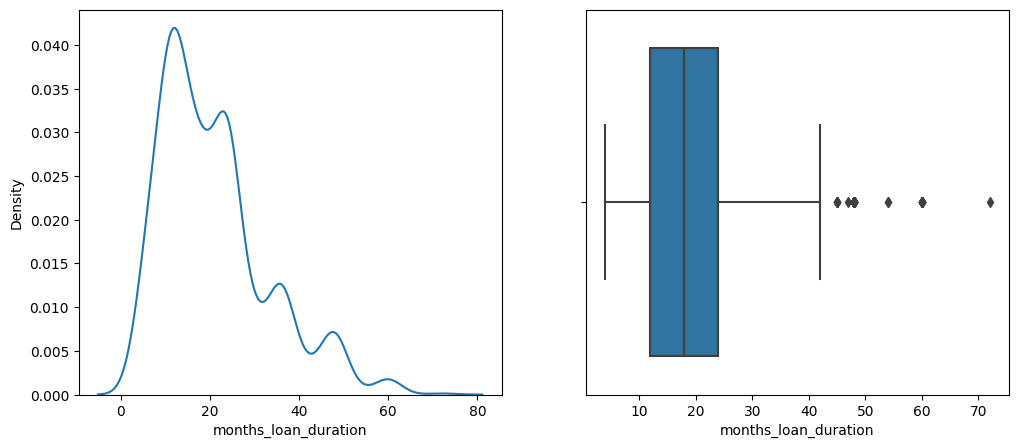

In [181]:
#Analysing the months loan duration column
fig, axes = plt.subplots(1,2, figsize=(12,5))

sns.kdeplot(x = 'months_loan_duration', data = df, ax = axes[0])
sns.boxplot(x = 'months_loan_duration', data = df, ax = axes[1])

In [182]:
loan = df.groupby('default')['months_loan_duration'].mean().reset_index()
loan

,default,months_loan_duration
0,no,19.207143
1,yes,24.860000


those people are given loan who have 24 months loan duration on an average

In [183]:
#analysing credit history column
ct2 = pd.crosstab(df['credit_history'], df['default'], normalize = 'index')
ct2*100

default,no,yes
credit_history,,
critical,82.935154,17.064846
good,68.113208,31.886792
perfect,37.500000,62.500000
poor,68.181818,31.818182
very good,42.857143,57.142857


In [184]:
df['credit_history'].value_counts()

good         530
critical     293
poor          88
very good     49
perfect       40
Name: credit_history, dtype: int64

In [185]:
#Analysing the purpose column
ct3 = pd.crosstab(df['purpose'], df['default'], normalize = 'index')
ct3*100

default,no,yes
purpose,,
business,64.948454,35.051546
car,68.545994,31.454006
car0,58.333333,41.666667
education,61.016949,38.983051
furniture/appliances,73.784355,26.215645
renovations,63.636364,36.363636


<Axes: xlabel='amount'>

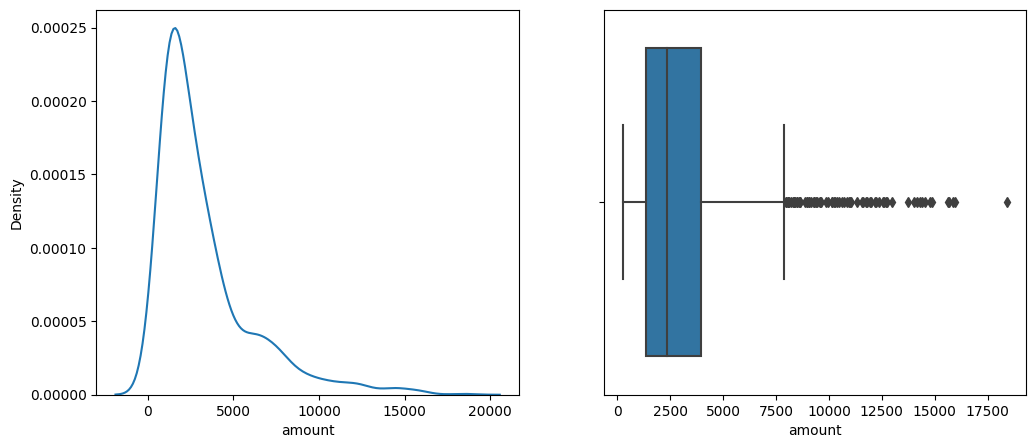

In [186]:
#Analysing the amount column
fig, axes = plt.subplots(1,2, figsize=(12,5))

sns.kdeplot(x = 'amount', data = df, ax = axes[0])
sns.boxplot(x = 'amount', data = df, ax = axes[1])

Left skewed distribution

In [187]:
amnt = df.groupby('default')['amount'].mean().reset_index()
amnt

,default,amount
0,no,2985.457143
1,yes,3938.126667


People who are given loan are  given higher amount on an average

In [188]:
#Analyzing the 'savings_balance' column
df['savings_balance'].value_counts()

< 100 SGD         603
unknown           183
100 - 500 SGD     103
500 - 1000 SGD     63
> 1000 SGD         48
Name: savings_balance, dtype: int64

In [189]:
#Analysing the purpose column
ct4 = pd.crosstab(df['purpose'], df['default'], normalize = 'index')
ct4*100

default,no,yes
purpose,,
business,64.948454,35.051546
car,68.545994,31.454006
car0,58.333333,41.666667
education,61.016949,38.983051
furniture/appliances,73.784355,26.215645
renovations,63.636364,36.363636


In [190]:
#Analyzing the 'employement duration' column
df['employment_duration'].value_counts()

1 - 4 years    339
> 7 years      253
4 - 7 years    174
< 1 year       172
unemployed      62
Name: employment_duration, dtype: int64

In [191]:
#Analysing the employement duration column
ct5 = pd.crosstab(df['employment_duration'], df['default'], normalize = 'index')
ct5*100

default,no,yes
employment_duration,,
1 - 4 years,69.321534,30.678466
4 - 7 years,77.586207,22.413793
< 1 year,59.302326,40.697674
> 7 years,74.703557,25.296443
unemployed,62.903226,37.096774


In [192]:
#Analyzing the 'percent of income' column
df['percent_of_income'].value_counts()

4    476
2    231
3    157
1    136
Name: percent_of_income, dtype: int64

In [193]:
#Analysing the employement duration column
ct6 = pd.crosstab(df['percent_of_income'], df['default'], normalize = 'index')
ct6*100

default,no,yes
percent_of_income,,
1,75.000000,25.000000
2,73.160173,26.839827
3,71.337580,28.662420
4,66.596639,33.403361


In [194]:
#Analyzing the 'years at residence' column
df['years_at_residence'].value_counts()

4    413
2    308
3    149
1    130
Name: years_at_residence, dtype: int64

In [195]:
#Analysing the years at residence column
ct7 = pd.crosstab(df['years_at_residence'], df['default'], normalize = 'index')
ct7*100

default,no,yes
years_at_residence,,
1,72.307692,27.692308
2,68.506494,31.493506
3,71.140940,28.859060
4,69.975787,30.024213


In [196]:
#Analyzing the 'other_credit' column
print(df['other_credit'].value_counts())

print("\n")
ct8 = pd.crosstab(df['other_credit'], df['default'], normalize = 'index')
ct8*100

none     814
bank     139
store     47
Name: other_credit, dtype: int64




default,no,yes
other_credit,,
bank,58.992806,41.007194
none,72.481572,27.518428
store,59.574468,40.425532


In [197]:
#Analyzing the 'existing_loans_count' column
print(df['existing_loans_count'].value_counts())

print("\n")
ct9 = pd.crosstab(df['existing_loans_count'], df['default'], normalize = 'index')
ct9*100

1    633
2    333
3     28
4      6
Name: existing_loans_count, dtype: int64




default,no,yes
existing_loans_count,,
1,68.404423,31.595577
2,72.372372,27.627628
3,78.571429,21.428571
4,66.666667,33.333333


In [198]:
#Analyzing ghe 'housing' column
print(df['housing'].value_counts())

print("\n")
ct9 = pd.crosstab(df['housing'], df['default'], normalize = 'index')
ct9*100

own      713
rent     179
other    108
Name: housing, dtype: int64




default,no,yes
housing,,
other,59.259259,40.740741
own,73.913043,26.086957
rent,60.893855,39.106145


In [199]:
#Analyzing ghe 'job' column
print(df['job'].value_counts())

print("\n")
ct11 = pd.crosstab(df['job'], df['default'], normalize = 'index')
ct11*100

skilled       630
unskilled     200
management    148
unemployed     22
Name: job, dtype: int64




default,no,yes
job,,
management,65.540541,34.459459
skilled,70.476190,29.523810
unemployed,68.181818,31.818182
unskilled,72.000000,28.000000


In [200]:
#Analyzing ghe 'dependents' column
print(df['dependents'].value_counts())

print("\n")
ct12 = pd.crosstab(df['dependents'], df['default'], normalize = 'index')
ct12*100

1    845
2    155
Name: dependents, dtype: int64




default,no,yes
dependents,,
1,69.940828,30.059172
2,70.322581,29.677419


In [201]:
#Analyzing ghe 'phone' column
print(df['phone'].value_counts())

print("\n")
ct13 = pd.crosstab(df['phone'], df['default'], normalize = 'index')
ct13*100

no     596
yes    404
Name: phone, dtype: int64




default,no,yes
phone,,
no,68.624161,31.375839
yes,72.029703,27.970297


<Axes: xlabel='age'>

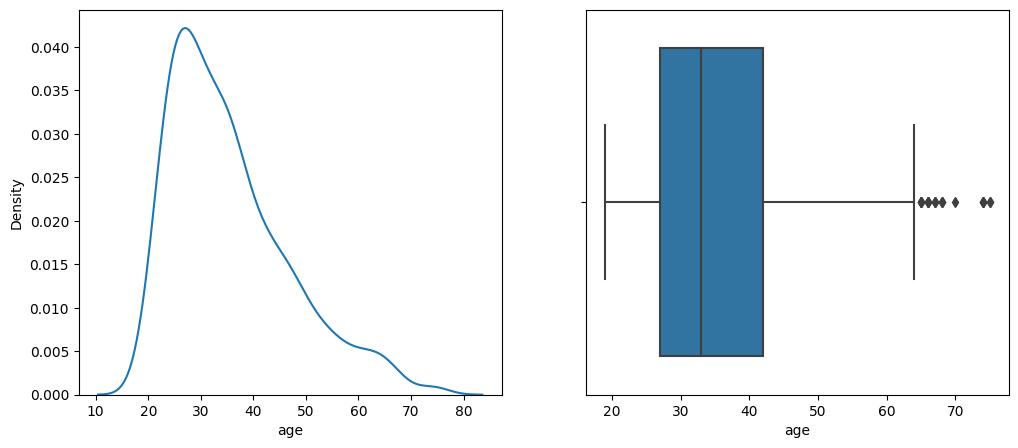

In [202]:
#Analysing the age column
fig, axes = plt.subplots(1,2, figsize=(12,5))

sns.kdeplot(x = 'age', data = df, ax = axes[0])
sns.boxplot(x = 'age', data = df, ax = axes[1])

In [203]:
age = df.groupby('default')['age'].mean().reset_index()
age

,default,age
0,no,36.224286
1,yes,33.963333


<ipython-input-204-e0db1a134c82>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

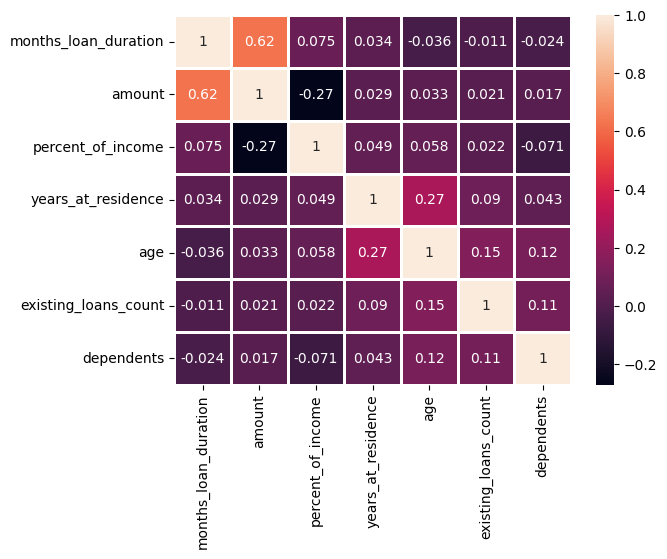

In [204]:
corr = df.corr()
sns.heatmap(corr, annot = True, linewidths = 0.75)

No significant correlations.

## **Data Preprocessing**

In [205]:
#encoding credit_history
df['credit_history'] = df['credit_history'].replace('critical', 1)
df['credit_history'] = df['credit_history'].replace('poor', 2)
df['credit_history'] = df['credit_history'].replace('good', 3)
df['credit_history'] = df['credit_history'].replace('very good', 4)
df['credit_history'] = df['credit_history'].replace('perfect', 5)

df['credit_history'] = pd.to_numeric(df['credit_history'])

In [206]:
#encoding the default variable
df['default'] = np.where(df['default']=='yes',1,0)

In [207]:
#one hot encoding the nominal variables
df = pd.get_dummies(df)

In [208]:
df

,months_loan_duration,credit_history,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents,default,checking_balance_1 - 200 SGD,...,other_credit_store,housing_other,housing_own,housing_rent,job_management,job_skilled,job_unemployed,job_unskilled,phone_no,phone_yes
0,6,1,1169,4,4,67,2,1,0,0,...,0,0,1,0,0,1,0,0,0,1
1,48,3,5951,2,2,22,1,1,1,1,...,0,0,1,0,0,1,0,0,1,0
2,12,1,2096,2,3,49,1,2,0,0,...,0,0,1,0,0,0,0,1,1,0
3,42,3,7882,2,4,45,1,2,0,0,...,0,1,0,0,0,1,0,0,1,0
4,24,2,4870,3,4,53,2,2,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,3,1736,3,4,31,1,1,0,0,...,0,0,1,0,0,0,0,1,1,0
996,30,3,3857,4,4,40,1,1,0,0,...,0,0,1,0,1,0,0,0,0,1
997,12,3,804,4,4,38,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0
998,45,3,1845,4,4,23,1,1,1,0,...,0,1,0,0,0,1,0,0,0,1


In [209]:
#outlier removal and detection
iqr1 = df['age'].quantile(q=0.75) - df['age'].quantile(q=0.25)
iqr2 = df['amount'].quantile(q=0.75) - df['amount'].quantile(q=0.25)
iqr3 = df['months_loan_duration'].quantile(q=0.75) - df['months_loan_duration'].quantile(q=0.25)

u1 = df['age'].quantile(q=0.75) + 1.5*iqr1
u2 = df['amount'].quantile(q=0.75) + 1.5*iqr2
u3 = df['months_loan_duration'].quantile(q=0.75) + 1.5*iqr3

l1 = df['age'].quantile(q=0.75) - 1.5*iqr1
l2 = df['amount'].quantile(q=0.75) - 1.5*iqr2
l3 = df['months_loan_duration'].quantile(q=0.75) - 1.5*iqr3

#capping the outliers (of numerical varaibles)
df['age'] = np.where(df['age']>u1,u1,np.where(df['age']<l1,l1,df['age']))
df['amount'] = np.where(df['amount']>u2,u2,np.where(df['amount']<l2,l2,df['amount']))
df['months_loan_duration'] = np.where(df['months_loan_duration']>u3,u3,np.where(df['months_loan_duration']<l3,l3,df['months_loan_duration']))

In [210]:
#feature scaling
scl = MinMaxScaler()
scl_df = scl.fit_transform(df)
scl_df = pd.DataFrame(scl_df, columns = df.columns)

In [211]:
scl_df

,months_loan_duration,credit_history,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents,default,checking_balance_1 - 200 SGD,...,other_credit_store,housing_other,housing_own,housing_rent,job_management,job_skilled,job_unemployed,job_unskilled,phone_no,phone_yes
0,0.000000,0.00,0.120408,1.000000,1.000000,1.000000,0.333333,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.000000,0.50,0.746950,0.333333,0.333333,0.055556,0.000000,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.166667,0.00,0.241864,0.333333,0.666667,0.655556,0.000000,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,1.000000,0.50,0.999951,0.333333,1.000000,0.566667,0.000000,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.500000,0.25,0.605316,0.666667,1.000000,0.744444,0.333333,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.166667,0.50,0.194697,0.666667,1.000000,0.255556,0.000000,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
996,0.666667,0.50,0.472592,1.000000,1.000000,0.455556,0.000000,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
997,0.166667,0.50,0.072586,1.000000,1.000000,0.411111,0.000000,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
998,1.000000,0.50,0.208978,1.000000,1.000000,0.077778,0.000000,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


## **Model Developement**

In [212]:
#splitting the target variable
x = scl_df.drop(['default'], axis =1)
y = scl_df['default']

In [213]:
#train test split
x_train, x_test,  y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 100)

clf = LogisticRegression()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [214]:
clf.score(x,y)

0.762